### K-means clustering (algorytm centroidów)

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Load data
df = pd.read_parquet('./IDS2017/Final/DDoS_Attacks.parquet')
print(df.columns)

# Wybór odpowiednich kolumn (pomijamy kolumnę 'Label')
features = df[[' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Fwd Header Length', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes',
       'Init_Win_bytes_forward', ' act_data_pkt_fwd']]


Index([' Label', ' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Fwd Header Length', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes',
       'Init_Win_bytes_forward', ' act_data_pkt_fwd'],
      dtype='object')


In [7]:
# Uruchomienie algorytmu K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(features)

# Dodanie etykiet klastrów do oryginalnych danych
df['Cluster'] = kmeans.labels_

# Wyświetl pierwsze wiersze z etykietami klastrów
print(df.head())

    Label   Destination Port  Total Length of Fwd Packets  \
0  BENIGN              54865                           12   
1  BENIGN              55054                            6   
2  BENIGN              55055                            6   
3  BENIGN              46236                            6   
4  BENIGN              54863                           12   

    Fwd Packet Length Max   Fwd Packet Length Mean   Fwd Header Length  \
0                       6                      6.0                  40   
1                       6                      6.0                  20   
2                       6                      6.0                  20   
3                       6                      6.0                  20   
4                       6                      6.0                  40   

    Avg Fwd Segment Size   Subflow Fwd Bytes  Init_Win_bytes_forward  \
0                    6.0                  12                      33   
1                    6.0                   6

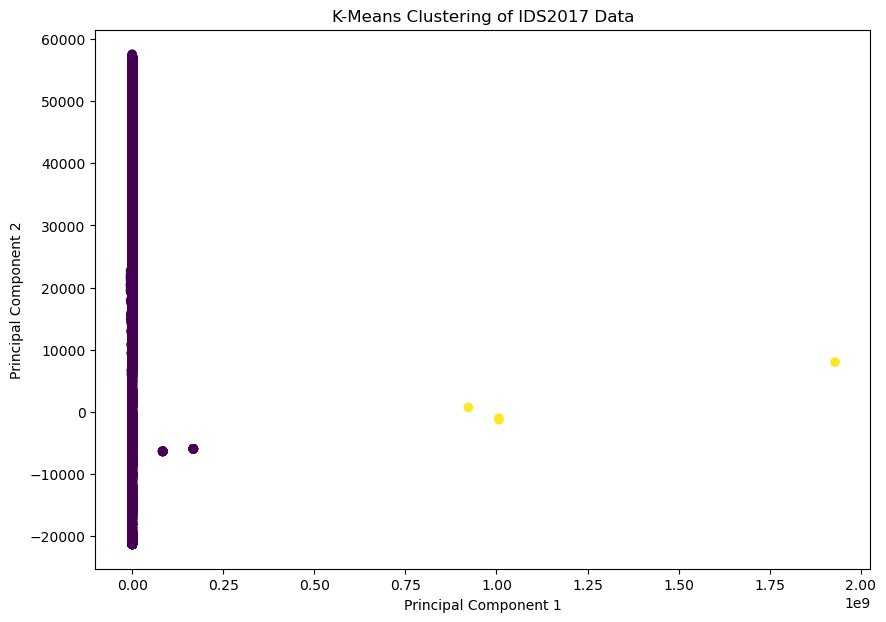

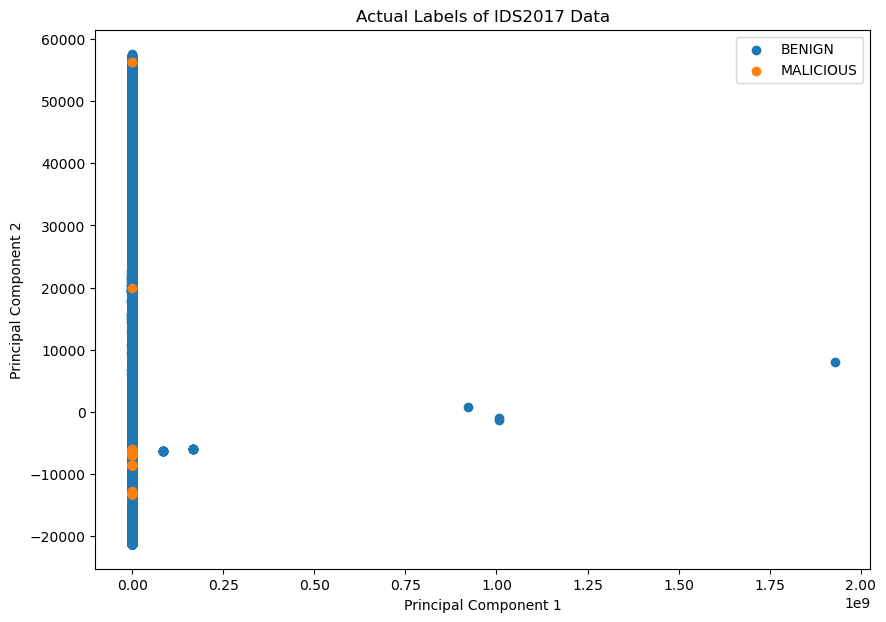

In [11]:
# Szybkie PCA do redukcji wymiarów w celu wizualizacji
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_
df_pca[' Label'] = df[' Label']

# Wykres uzyskanych klastrów
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of IDS2017 Data')
plt.show()

# Rysowanie oryginalnego podziału benign vs malicious
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[df_pca[' Label'] == 'BENIGN']['PC1'], df_pca[df_pca[' Label'] == 'BENIGN']['PC2'], label='BENIGN')
plt.scatter(df_pca[df_pca[' Label'] != 'BENIGN']['PC1'], df_pca[df_pca[' Label'] != 'BENIGN']['PC2'], label='MALICIOUS')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Actual Labels of IDS2017 Data')
plt.legend()
plt.show()